In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable

In [68]:
# Lists for Ordinary customer
Arrival_T_1 = []
Start_Service_T_1 = []
Waiting_T_1 = []
Completion_T_1 = []
Total_T_in_System_1 = []
Service_T_1 = []
Inter_Arrival_T_1 = []
idle1 = []
# Lists for Distinguished customer
Arrival_T_2 = []
Start_Service_T_2 = []
Waiting_T_2 = []
Completion_T_2 = []
Total_T_in_System_2 = []
Service_T_2 = []
Inter_Arrival_T_2 = []
idle2 = []

# lists for store type of customers
Type_of_customer = []
o_customer = []
d_customer = []

def type_customer():
   return(random.randint(0, 1))

for i in range (10):
    a=type_customer()
    Type_of_customer.append(a)
print("Type of customers list:")
print(Type_of_customer)
for i in range (10):
    a = Type_of_customer[i] 
    if a == 0:
        o_customer.append(a)
    else:
       d_customer.append(a)
print(f"total ordinary = {len(o_customer)}")
print(o_customer)
print(f"total distinguesh = {len(d_customer)}")
print(d_customer)
count = min(len(o_customer), len(d_customer))
print(count)

Type of customers list:
[0, 0, 1, 0, 0, 1, 1, 1, 0, 0]
total ordinary = 6
[0, 0, 0, 0, 0, 0]
total distinguesh = 4
[1, 1, 1, 1]
4


In [69]:
def random_0to1():
    return random.uniform(0, 1)

In [70]:
# inter_arrival_time for Ordinary Customer
for i in range(len(o_customer)):
    
    a = random_0to1()
    if a>=0 and a<0.09:
        I_A_T=0
    elif a>=0.09 and a<0.26:
        I_A_T=1
    elif a>=0.26 and a<0.53:
        I_A_T=2
    elif a>=0.53 and a<0.73:
        I_A_T=3
    elif a>=0.73 and a<0.88:
        I_A_T=4
    else:
        I_A_T=5
        
    Inter_Arrival_T_1.append(I_A_T)
    print(Inter_Arrival_T_1[i])

2
2
1
0
0
2


In [71]:
# inter_arrival_time for Distinguished Customer
for i in range(len(d_customer)):
    
    a = random_0to1()
    if a>=0 and a<0.1:
        I_A_T=1
    elif a>=0.1 and a<0.3:
        I_A_T=2
    elif a>=0.3 and a<0.6:
        I_A_T=3
    else:
        I_A_T=4
        
    Inter_Arrival_T_2.append(I_A_T)
    print(Inter_Arrival_T_2[i])

4
2
2
2


In [72]:
# service_time for Ordinary Customer
for i in range(len(o_customer)):
    
    a = random_0to1()
    if a>=0 and a<0.20:
        S_T=1
    elif a>=0.20 and a<0.60:
        S_T=2
    elif a>=0.60 and a<0.88:
        S_T=3
    else:
        S_T=4
    
    Service_T_1.append(S_T)
    print(Service_T_1[i])

2
2
2
3
4
3


In [73]:
# service_time for Distinguished Customer
for i in range(len(d_customer)):
    
    a = random_0to1()
    if a>=0 and a<0.10:
        S_T = 1
    elif a>=0.10 and a<0.40:
        S_T = 2
    elif a>=0.40 and a<0.78:
        S_T = 3
    else:
        S_T = 4
    
    Service_T_2.append(S_T)
    print(Service_T_2[i])

2
4
1
4


In [74]:
for i in range(len(o_customer)):
    # first customer
    if i == 0:
            Arrival_T_1.append(Inter_Arrival_T_1[i])
            Start_Service_T_1.append(Inter_Arrival_T_1[i])
            Waiting_T_1.append(0)
            Completion_T_1.append(Start_Service_T_1[i] + Service_T_1[i])
            Total_T_in_System_1.append(Completion_T_1[i] - Arrival_T_1[i])
            idle1.append(Inter_Arrival_T_1[i])
    else:
            Arrival_T_1.append(Arrival_T_1[i - 1] + Inter_Arrival_T_1[i])
            Start_Service_T_1.append(max(Arrival_T_1[i], Completion_T_1[i - 1]))
            Waiting_T_1.append(Start_Service_T_1[i] - Arrival_T_1[i])
            Completion_T_1.append(Start_Service_T_1[i] + Service_T_1[i])
            Total_T_in_System_1.append(Completion_T_1[i] - Arrival_T_1[i])
            idle1.append(Start_Service_T_1[i] - Completion_T_1[i - 1])
            
for i in range(len(d_customer)):
    # first customer
    if i == 0:
            Arrival_T_2.append(Inter_Arrival_T_2[i])
            Start_Service_T_2.append(Inter_Arrival_T_2[i])
            Waiting_T_2.append(0)
            Completion_T_2.append(Start_Service_T_2[i] + Service_T_2[i])
            Total_T_in_System_2.append(Completion_T_2[i] - Arrival_T_2[i])
            idle2.append(Inter_Arrival_T_2[i])# system no turn on
       
    else:
            Arrival_T_2.append(Arrival_T_2[i - 1] + Inter_Arrival_T_2[i])
            Start_Service_T_2.append(max(Arrival_T_2[i], Completion_T_2[i - 1]))
            Waiting_T_2.append(Start_Service_T_2[i] - Arrival_T_2[i])
            Completion_T_2.append(Start_Service_T_2[i] + Service_T_2[i])
            Total_T_in_System_2.append(Completion_T_2[i] - Arrival_T_2[i])
            idle2.append(Start_Service_T_2[i] - Completion_T_2[i - 1])

In [75]:
ordi = PrettyTable(['# Of Customer', 'inter_arrival_time_1', 'arrival_time', 'waiting_time', 'start_Service_time', 'service_time_1',
                 'compl_time', 'total_t_in_system', 'idle_time'])

for i in range(len(o_customer)):
    ordi.add_row([i+1, round(Inter_Arrival_T_1[i],3), round(Arrival_T_1[i],3), round(Waiting_T_1[i],3), round(Start_Service_T_1[i],3), round(Service_T_1[i],3),
               round(Completion_T_1[i],3),round(Total_T_in_System_1[i],3), round(idle1[i],3)])

ordi

# Of Customer,inter_arrival_time_1,arrival_time,waiting_time,start_Service_time,service_time_1,compl_time,total_t_in_system,idle_time
1,2,2,0,2,2,4,2,2
2,2,4,0,4,2,6,2,0
3,1,5,1,6,2,8,3,0
4,0,5,3,8,3,11,6,0
5,0,5,6,11,4,15,10,0
6,2,7,8,15,3,18,11,0


In [76]:
dis = PrettyTable(['# Of Customer', 'inter_arrival_time_2', 'arrival_time', 'waiting_time', 'start_Service_time', 'service_time_1',
                 'compl_time', 'total_t_in_system', 'idle_time'])

for i in range(len(d_customer)):
    dis.add_row([i+1, round(Inter_Arrival_T_2[i],3), round(Arrival_T_2[i],3), round(Waiting_T_2[i],3), round(Start_Service_T_2[i],3), round(Service_T_2[i],3),
               round(Completion_T_2[i],3),round(Total_T_in_System_2[i],3), round(idle2[i],3)])

dis

# Of Customer,inter_arrival_time_2,arrival_time,waiting_time,start_Service_time,service_time_1,compl_time,total_t_in_system,idle_time
1,4,4,0,4,2,6,2,4
2,2,6,0,6,4,10,4,0
3,2,8,2,10,1,11,3,0
4,2,10,1,11,4,15,5,0


In [77]:
print(f"The average service time of the teller = {(sum(Service_T_1) + sum(Service_T_2)) / len(Type_of_customer)} min")
print(f"The average waiting time in the ordinary customers queue = {sum(Waiting_T_1) / len(o_customer)} min")
print(f"The average waiting time in the distinguished customers queue = {sum(Waiting_T_2) / len(d_customer)} min")
print(f"The maximum ordinary customers queue length = {len(o_customer)}")
print(f"The maximum distinguished customers queue length = {len(d_customer)}")
count1 = 0
count2 = 0
for i in range(len(Waiting_T_1)):
    if Waiting_T_1[i] != 0:
        count1 += 1
for i in range(len(Waiting_T_2)):
    if Waiting_T_2[i] != 0:
        count2 += 1

print(f"The probability that an ordinary customer wait in the queue = {count1 / len(o_customer)}")
print(f"The probability that an distinguished customer wait in the queue = {count2 / len(d_customer)}")
print(f"The portion of idle time of the teller = {(sum(idle1) + sum(idle2))/ 100}")

The average service time of the teller = 2.7 min
The average waiting time in the ordinary customers queue = 3.0 min
The average waiting time in the distinguished customers queue = 0.75 min
The maximum ordinary customers queue length = 6
The maximum distinguished customers queue length = 4
The probability that an ordinary customer wait in the queue = 0.6666666666666666
The probability that an distinguished customer wait in the queue = 0.5
The portion of idle time of the teller = 0.06


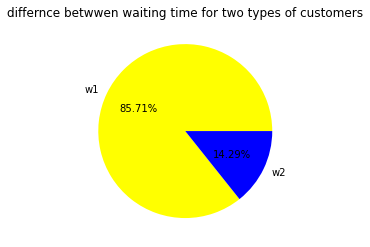

In [82]:
labels = ['w1', 'w2']
colors = ['yellow', 'blue']
plt.pie([sum(Waiting_T_1),sum(Waiting_T_2)], labels = labels, colors = colors, autopct='%.2f%%')
plt.title('differnce betwwen waiting time for two types of customers')
plt.show()

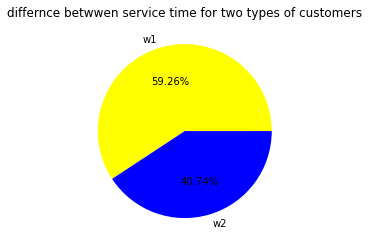

In [84]:
labels = ['w1', 'w2']
colors = ['yellow', 'blue']
plt.pie([sum(Service_T_1),sum(Service_T_2)], labels = labels, colors = colors, autopct='%.2f%%')
plt.title('differnce betwwen service time for two types of customers')
plt.show()

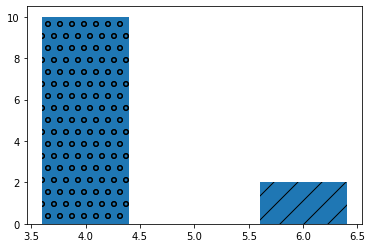

<Figure size 432x288 with 0 Axes>

In [86]:
labels = [len(o_customer), len(d_customer)]
values = [2,10]
bars = plt.bar(labels,values)
pattrens = ['/','o']
for bar in bars:
    bar.set_hatch(pattrens.pop(0))
plt.figure(figsize = (6,4))
plt.show()